In [1]:
import numpy as np
import pandas as pd

In [2]:
OnlRt = pd.read_csv(
    'OnlineRetail.csv',
    usecols = ['CustomerID', 'InvoiceDate', 'UnitPrice', 'Quantity', 'Country'],
    encoding = 'ISO-8859-1',
    parse_dates = ['InvoiceDate'],
    dtype={
        'CustomerID': str, 
        'UnitPrice': np.float32, 
        'Quantity': np.int32, 
        'Country': str
    }
)

In [3]:
OnlRt.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
neg_id = OnlRt[(OnlRt['Quantity']<=0)|(OnlRt['UnitPrice']<=0)].loc[:, 'CustomerID']
data0 = OnlRt[(OnlRt['CustomerID'].notnull())&
             (~OnlRt['CustomerID'].isin(neg_id))&
             (OnlRt['Country']=='United Kingdom')].drop('Country', axis=1)

In [5]:
data0

,Quantity,InvoiceDate,UnitPrice,CustomerID
46,80,2010-12-01 09:00:00,2.55,13748
142,12,2010-12-01 09:45:00,0.85,16098
143,8,2010-12-01 09:45:00,3.75,16098
144,12,2010-12-01 09:45:00,1.65,16098
145,10,2010-12-01 09:45:00,1.95,16098
...,...,...,...,...
541697,1,2011-12-09 11:34:00,0.65,14446
541698,1,2011-12-09 11:34:00,5.45,14446
541699,1,2011-12-09 11:34:00,2.10,14446
541700,1,2011-12-09 11:34:00,1.25,14446


In [6]:
data1 = data0.copy()
data1['amount'] = data1['UnitPrice'] * data1['Quantity']

In [7]:
first_data = data1['InvoiceDate'].sort_values(ascending=True).groupby(data1['CustomerID']).nth(0).apply(lambda x: x.date()).reset_index().rename(columns={'InvoiceDate': 'first_time'})

In [8]:
data2 = pd.merge(data1, first_data, how='left', on=['CustomerID'])

In [9]:
data2

,Quantity,InvoiceDate,UnitPrice,CustomerID,amount,first_time
0,80,2010-12-01 09:00:00,2.55,13748,203.999996,2010-12-01
1,12,2010-12-01 09:45:00,0.85,16098,10.200000,2010-12-01
2,8,2010-12-01 09:45:00,3.75,16098,30.000000,2010-12-01
3,12,2010-12-01 09:45:00,1.65,16098,19.800000,2010-12-01
4,10,2010-12-01 09:45:00,1.95,16098,19.500000,2010-12-01
...,...,...,...,...,...,...
140376,1,2011-12-09 11:34:00,0.65,14446,0.650000,2011-04-07
140377,1,2011-12-09 11:34:00,5.45,14446,5.450000,2011-04-07
140378,1,2011-12-09 11:34:00,2.10,14446,2.100000,2011-04-07
140379,1,2011-12-09 11:34:00,1.25,14446,1.250000,2011-04-07


In [10]:
dayth = (data2['InvoiceDate'].apply(lambda x: x.date()) - data2['first_time']).apply(lambda x: x.days)

In [11]:
month = data2['InvoiceDate'].apply(lambda x: x.month)
weekday = data2['InvoiceDate'].apply(lambda x: x.weekday())
hour = data2['InvoiceDate'].apply(lambda x: x.hour)
minute = data2['InvoiceDate'].apply(lambda x: x.minute)
second = data2['InvoiceDate'].apply(lambda x: x.second)

In [12]:
hour_preci = (second/60+minute)/60+hour

In [13]:
data3 = data2.assign(dayth=dayth).assign(hour=hour_preci).assign(weekday=weekday).drop(['first_time', 'InvoiceDate'], axis=1).sort_values(by=['CustomerID', 'dayth', 'hour'])

In [14]:
data3

,Quantity,UnitPrice,CustomerID,amount,dayth,hour,weekday
3205,12,2.55,12747,30.599999,0,15.633333,6
3206,6,2.55,12747,15.300000,0,15.633333,6
3207,16,1.69,12747,27.040001,0,15.633333,6
3208,24,1.65,12747,39.599999,0,15.633333,6
3209,6,5.45,12747,32.699999,0,15.633333,6
...,...,...,...,...,...,...,...
93991,12,0.42,18287,5.040000,143,10.383333,2
93992,12,2.10,18287,25.199999,143,10.383333,2
105062,36,1.25,18287,45.000000,159,9.483333,4
105063,48,0.39,18287,18.719999,159,9.483333,4


In [42]:
X = data3[data3['dayth']<28].set_index('CustomerID').drop('amount', axis=1).sort_index()

In [43]:
data180 = data3[(data3['dayth']<180) & (data3['CustomerID'].isin(X.index))]
y = data180['amount'].groupby(data180['CustomerID']).sum().sort_index()

In [44]:
data180

,Quantity,UnitPrice,CustomerID,amount,dayth,hour,weekday
3205,12,2.55,12747,30.599999,0,15.633333,6
3206,6,2.55,12747,15.300000,0,15.633333,6
3207,16,1.69,12747,27.040001,0,15.633333,6
3208,24,1.65,12747,39.599999,0,15.633333,6
3209,6,5.45,12747,32.699999,0,15.633333,6
...,...,...,...,...,...,...,...
93991,12,0.42,18287,5.040000,143,10.383333,2
93992,12,2.10,18287,25.199999,143,10.383333,2
105062,36,1.25,18287,45.000000,159,9.483333,4
105063,48,0.39,18287,18.719999,159,9.483333,4


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Conv1D, Dropout, LSTM, TimeDistributed, Bidirectional, Dense

In [47]:
from keras.models import Model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [48]:
X

,Quantity,UnitPrice,dayth,hour,weekday
CustomerID,,,,,
12747,12,2.55,0,15.633333,6
12747,6,2.55,0,15.633333,6
12747,16,1.69,0,15.633333,6
12747,24,1.65,0,15.633333,6
12747,6,5.45,0,15.633333,6
...,...,...,...,...,...
18287,36,1.65,0,10.650000,6
18287,60,1.45,0,10.650000,6
18287,12,1.65,0,10.650000,6


In [49]:
y = pd.DataFrame(y)

In [50]:
y

,amount
CustomerID,
12747,2091.400013
12820,170.460002
12821,92.720000
12823,1224.000015
12824,397.120001
...,...
18278,173.899997
18280,180.599999
18281,80.820001


In [51]:
X.index = X.index.rename('id')
y.index = y.index.rename('id')

In [52]:
indices = y.index.tolist()

In [53]:
ind_train, ind_test = map(sorted, train_test_split(indices, test_size=.25, random_state=42))

In [54]:
X_train = X.loc[ind_train, :]
y_train = y.loc[ind_train]
X_test = X.loc[ind_test, :]
y_test = y.loc[ind_test]

In [55]:
X_train

,Quantity,UnitPrice,dayth,hour,weekday
id,,,,,
12747,12,2.55,0,15.633333,6
12747,6,2.55,0,15.633333,6
12747,16,1.69,0,15.633333,6
12747,24,1.65,0,15.633333,6
12747,6,5.45,0,15.633333,6
...,...,...,...,...,...
18283,6,1.25,17,14.966667,6
18283,1,4.95,17,14.966667,6
18283,6,1.25,17,14.966667,6


In [56]:
scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                             columns=X_train.columns,
                             index=X_train.index)

In [57]:
y_train_log = y_train.apply(np.log)

In [58]:
week_train = X_train['dayth'].apply(lambda x: int(x//7)).rename('week')

In [59]:
columns_picked = list(X_train.columns)

In [60]:
columns_picked

['Quantity', 'UnitPrice', 'dayth', 'hour', 'weekday']

In [61]:
inner_length = 32
outer_length = 4
feature_len = len(columns_picked)

In [62]:
def cut_pad(x, maxl):
    head = np.array(x)[0:maxl]
    head_padding = head if len(head) == maxl else np.pad(head, (0, maxl-len(head)), mode='constant')
    return head_padding

In [69]:
def feature_array(df, col_n, week, len_outer, len_inner):
    
    col = df[[col_n]].assign(week=week).reset_index()
    
    ids = col['id'].drop_duplicates().values.tolist()
    weeks = np.arange(0, len_outer).tolist()
    
    id_week = pd.DataFrame([(id, week) for id in ids for week in weeks]).rename(columns={0:'id', 1:'week'}).sort_values(by=['id', 'week']
                                                                                                                       )
    arr_base = pd.merge(id_week, col, how='left', on=['id', 'week']).fillna(0)
    
    arr_frame = arr_base[col_n].groupby([arr_base['id'], arr_base['week']]).apply(lambda x: cut_pad(x, len_inner)).reset_index().drop('week', axis=1).set_index('id')[col_n]
    
    userarray = arr_frame.groupby(arr_frame.index).apply(np.vstack).apply(lambda x: x.reshape([1, x.shape[0], x.shape[1]])).sort_index()
    userarray_var = np.vstack(userarray.values.tolist())
    return userarray.index.tolist(), userarray_var
    

In [70]:
def make_data_array(df, columns, week, len_outer, len_inner):
    ids_num = len(set(df.index))
    
    df_ready = np.zeros([ids_num, len_outer, len_inner, len(columns)])
    for i, item in enumerate(columns):
        the_ind, df_ready[:, :, :, i] = feature_array(df, item, week, len_outer, len_inner)
        
    return the_ind, df_ready

In [71]:
X_train_ind, X_train_data = make_data_array(X_train_scaled, columns_picked, week_train, outer_length, inner_length)

In [75]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),
                             columns=X_test.columns,
                             index=X_test.index)
y_test_log = y_test.apply(np.log)
week_test = X_test['dayth'].apply(lambda x: int(x//7)).rename('week')
X_test_ind, X_test_data = make_data_array(X_test_scaled, columns_picked, week_test, outer_length, inner_length)

In [80]:
def build_model(len_outer, len_inner, len_fea):
    filters = [64, 32]
    kernel_size = [2, 2]
    dropout_rate = [0.1, 0]
    
    inner_input = Input(shape=(len_inner, len_fea), dtype='float32')
    cnn1d = inner_input
    
    for i in range(len(filters)):
        cnn1d = Conv1D(filters=filters[i],
                     kernel_size=kernel_size[i],
                     padding='valid',
                     activation='relu',
                     strides=1)(cnn1d)
        cnn1d = Dropout(dropout_rate[i])(cnn1d)
    lstm = LSTM(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)(cnn1d)
    inner_output = LSTM(16, return_sequences=False)(lstm)
    inner_model = Model(inputs=inner_input, outputs=inner_output)
    
    outer_input = Input(shape=(len_outer, len_inner, len_fea), dtype='float32')
    innered = TimeDistributed(inner_model)(outer_input)
    outered = Bidirectional(LSTM(16, return_sequences=False))(innered)
    outered = Dense(8, activation='relu')(outered)
    outer_output = Dense(1)(outered)
    
    model = Model(inputs=outer_input, outputs=outer_output)
    model.compile(loss='mape', optimizer='adam')
    
    return model, inner_model

In [81]:
LTV_model, LTV_inner_model = build_model(outer_length, inner_length, feature_len)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [82]:
LTV_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 4, 32, 5)          0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 16)             16288     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 20,785
Trainable params: 20,785
Non-trainable params: 0
_________________________________________________________________


In [83]:
LTV_inner_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 31, 64)            704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 32)            4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 32)            8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
Total para

In [84]:
cb = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
history = LTV_model.fit(x=X_train_data,
                       y=y_train_log,
                       validation_data=(X_test_data, y_test_log),
                       epochs=200,
                       batch_size=128,
                       callbacks=[cb],
                       verbose=2)
LTV_model.save('LTV_model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1900 samples, validate on 634 samples
Epoch 1/200





 - 5s - loss: 97.7675 - val_loss: 92.8357
Epoch 2/200
 - 2s - loss: 80.5055 - val_loss: 64.7153
Epoch 3/200
 - 2s - loss: 46.4683 - val_loss: 23.2003
Epoch 4/200
 - 2s - loss: 15.9270 - val_loss: 14.3491
Epoch 5/200
 - 2s - loss: 14.2176 - val_loss: 12.6975
Epoch 6/200
 - 2s - loss: 13.3928 - val_loss: 12.2284
Epoch 7/200
 - 2s - loss: 13.3151 - val_loss: 12.3343
Epoch 8/200
 - 2s - loss: 13.3073 - val_loss: 12.2288
Epoch 9/200
 - 2s - loss: 13.2811 - val_loss: 12.2579
Epoch 10/200
 - 2s - loss: 13.2842 - val_loss: 12.1550
Epoch 11/200
 - 2s - loss: 13.2420 - val_loss: 12.2667
Epoch 12/200
 - 2s - loss: 13.1852 - val_loss: 12.0544
Epoch 13/200
 - 2s - loss: 13.0818 - val_loss: 11.9533
Epoch 14/200
 - 2s - loss: 12.9890 - val_loss: 11.9283
Epoch 15/200
 - 2s - loss: 12.9246 - val_loss: 11.7853
Epoch 16/200
 - 2s - loss: 12.8051 

[0, 200, 0, 100]

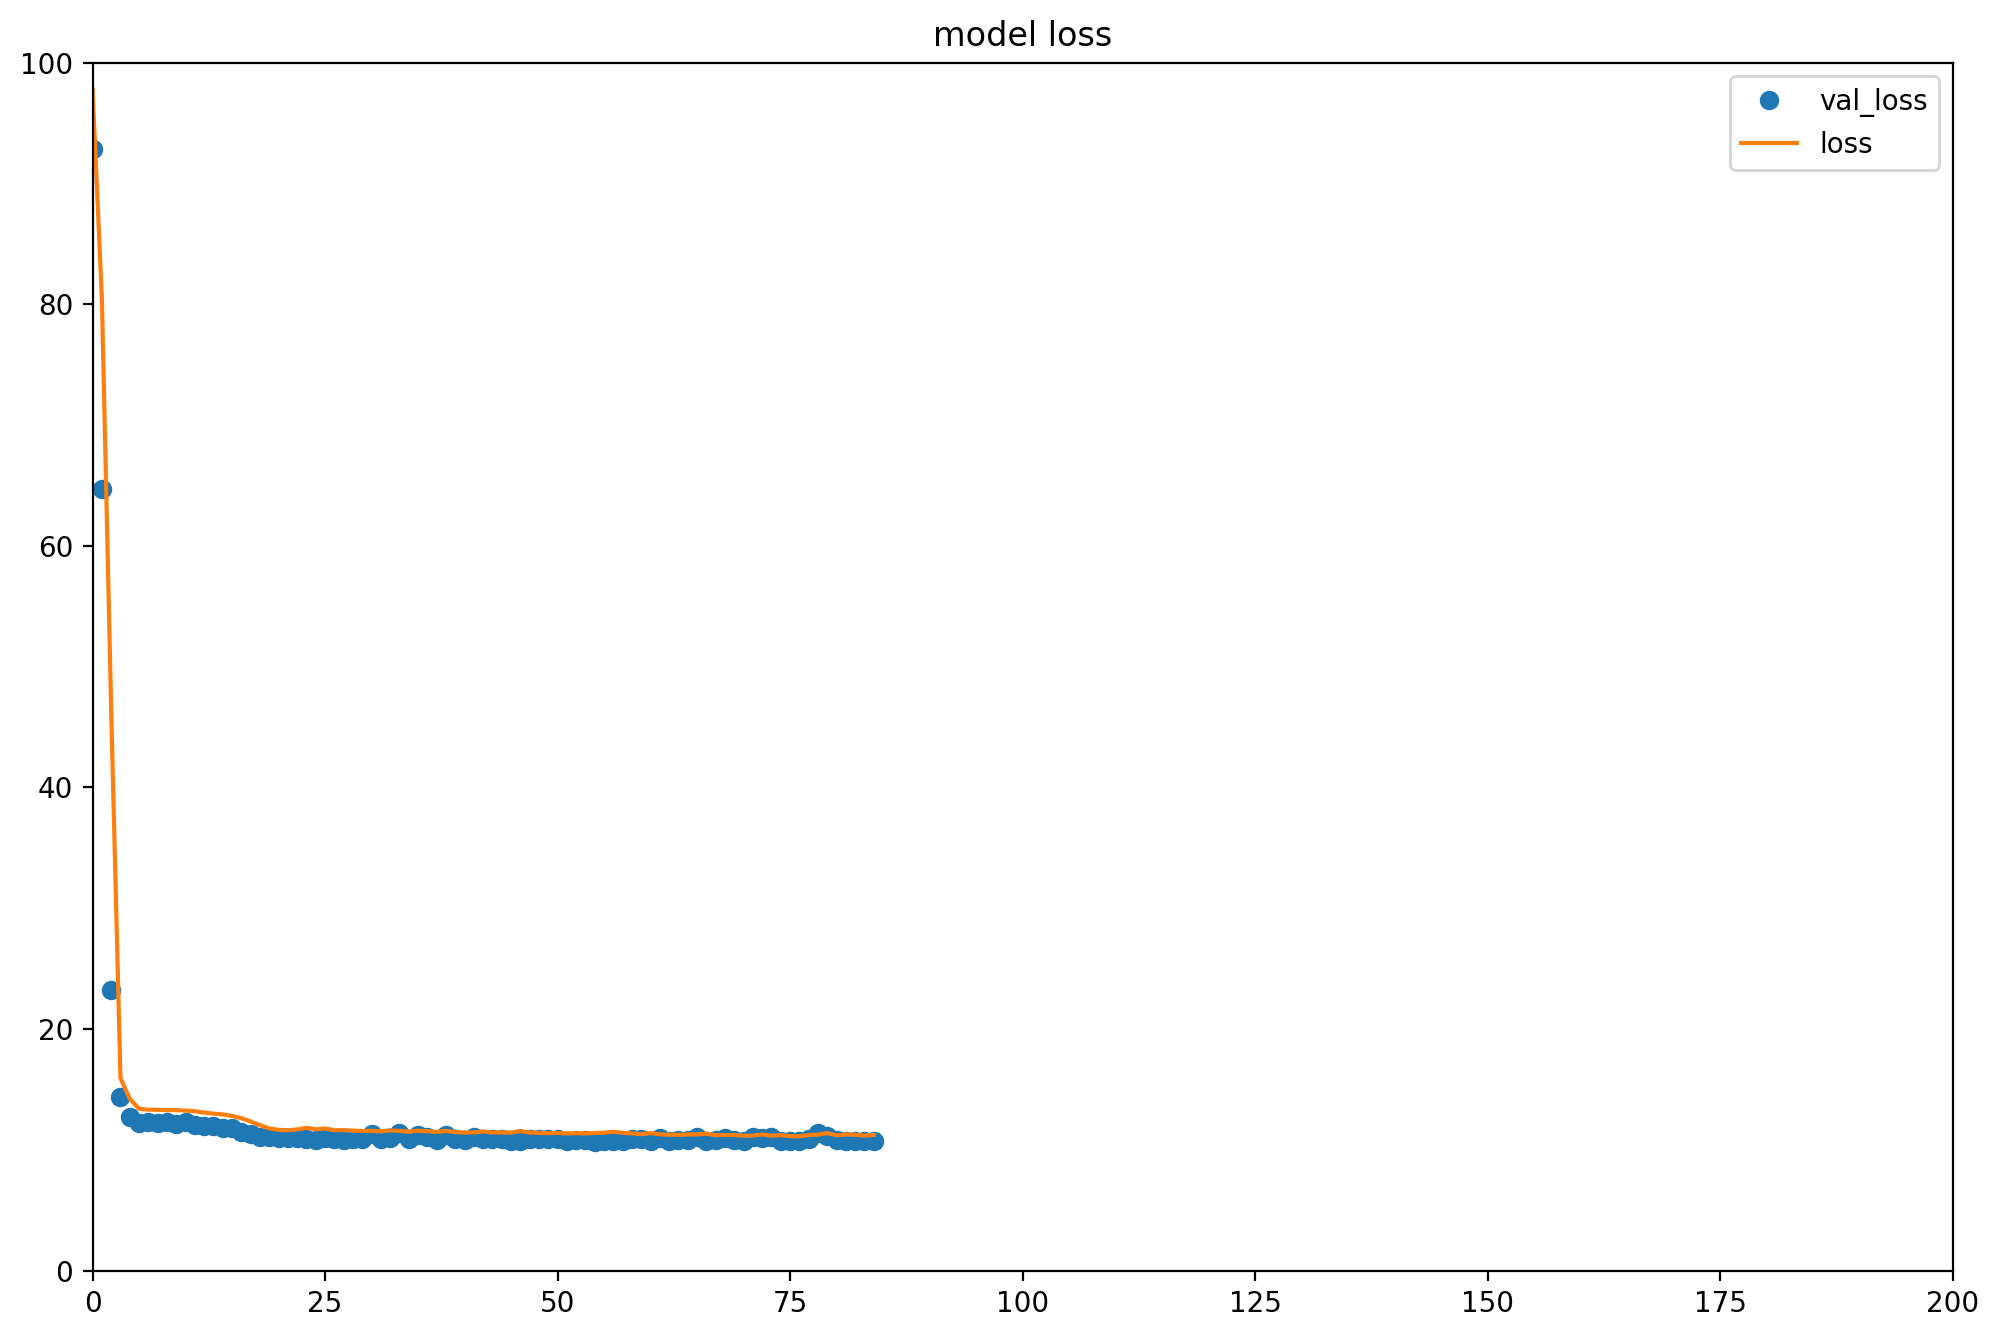

In [86]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(history.history['val_loss'], 'o', label='val_loss')
plt.plot(history.history['loss'], '-', label='loss')
plt.title('model loss')
plt.legend()
plt.axis([0, 200, 0, 100])